<a href="https://colab.research.google.com/github/weymouth/NumericalPython/blob/main/04FlowPlotExample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Example: Potential Flow Plot

The Matplotlib `plot` (line), `scatter`, and `hist`(histogram) functions are sufficient for 90% of engineering analysis, but more advanced plotting functions can also be useful. 

As an example, the function below plots the streamlines and velocity field given a potential flow stream-function. The youtube video walks through the construction of this function step-by-step.

In [1]:
import numpy as np # importing numpy
from matplotlib import pyplot as plt   # import plotting library

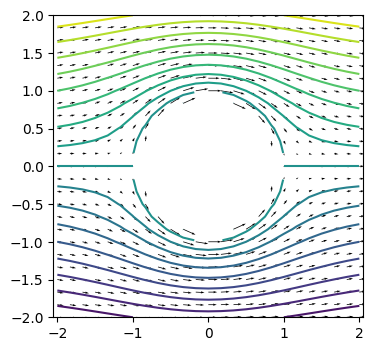

In [2]:
def plot_flow(psi, mask = None,
              x=np.linspace(-2,2,25), y=np.linspace(-2,2,25), h=1e-6):
    """
    Plot a potential flow using the streamfunction. The velocity
    vectors are approximated using finite differences.
    
    Inputs:
     - psi: stream function of x,y
     - mask: bool function of x,y for locations to be masked out
     - x,y: 1D spacing array in x,y. defaults to np.linspace(-2,2,25)
     - h:   finite different spacing to compute U,V. defaults to 1e-6
    """
    X,Y = np.meshgrid(x,y)
    if mask:
        X,Y = (np.ma.masked_where(mask(X,Y),X), 
               np.ma.masked_where(mask(X,Y),Y))
    U =  (psi(X,Y+h)-psi(X,Y-h))/(2*h)
    V = -(psi(X+h,Y)-psi(X-h,Y))/(2*h)
    
    plt.figure(figsize=(4,4),dpi=100)       # make the plot
    plt.quiver(X,Y,U,V)
    plt.contour(X,Y,psi(X,Y),levels=20)
    plt.axis('equal')
    
uniform = lambda x,y: y
corner = lambda x,y: x*y
circle = lambda x,y: y-y/(x**2+y**2)
circle_mask = lambda x,y: x**2+y**2<0.8

plot_flow(circle,circle_mask)

In [3]:
help(plot_flow)

Help on function plot_flow in module __main__:

plot_flow(psi, mask=None, x=array([-2.        , -1.83333333, -1.66666667, -1.5       , -1.33333333,
       -1.16666667, -1.        , -0.83333333, -0.66666667, -0.5       ,
       -0.33333333, -0.16666667,  0.        ,  0.16666667,  0.33333333,
        0.5       ,  0.66666667,  0.83333333,  1.        ,  1.16666667,
        1.33333333,  1.5       ,  1.66666667,  1.83333333,  2.        ]), y=array([-2.        , -1.83333333, -1.66666667, -1.5       , -1.33333333,
       -1.16666667, -1.        , -0.83333333, -0.66666667, -0.5       ,
       -0.33333333, -0.16666667,  0.        ,  0.16666667,  0.33333333,
        0.5       ,  0.66666667,  0.83333333,  1.        ,  1.16666667,
        1.33333333,  1.5       ,  1.66666667,  1.83333333,  2.        ]), h=1e-06)
    Plot a potential flow using the streamfunction. The velocity
    vectors are approximated using finite differences.
    
    Inputs:
     - psi: stream function of x,y
     - mask: bool